# LIBRARIES

In [1]:
import pickle
from Environment import Environment
from UserCat import UserCat
from Product import Product
from Greedy_optimizer import *
import numpy as np
import matplotlib.pyplot as plt
from ucb1_greedy import *

# ENVIRONMENT DEFINITION 

- Environment fixed informations and Products definition

In [2]:
np.random.seed(1)

products=[]

nameofproduct= [ #name of products
    "Calabazas",
    "Hinojo",
    "Sesamo",
    "Girasol",
    "Amapola"
]
# Dictionary fixing the secondary products linked to 
secondary_dict= {        
    "Calabazas": [1,2],
    "Hinojo": [0,2],
    "Sesamo": [1,3],
    "Girasol": [2,4],
    "Amapola": [2,3]
}
# Matrix n_prod*n_prices collecting the possible prices for each product. Prices are in ascending order
prices = [[8., 9, 10, 11],
          [10., 13, 16, 19],
          [20., 23, 27, 31],
          [28., 31, 35, 39],
          [40., 43, 46, 49]]
# Production cost of the products
cost = [1.3, 1.8, 2.1, 3.5, 6]

#sarebbe interessante anche prendere da file il tutto così da cambiare tutto più facilmente
#calcolo i margini dai cost mi sembra più sensato e anche più veloce se dobbiamo cambiare continuamente
# Computation of margins linked to each product for a particular choice of price
cost2 = np.tile(np.array([cost]).transpose(), (1, 4))
margins = np.array(prices)-cost2
# Creation of the 5 objects of Product class
for i in range (5):
    products.append(Product(prices[i], i, nameofproduct[i],margins[i]))

# Parameter for the computation of the click probability on the SECOND secondary product
lambda_q = 0.7

- User Category 1: Young and Inexpert

In [3]:
# Parameters for the distribution describing the reservation price
res_price_params_1 = {
    "mean": [12, 15, 20, 25, 35],  
    "std": [1, 1, 1, 1.5, 2]
}
# Matrix collecting the graph_weights describing mechanism of click on secondary products
probabilities_1 = [[0, 0.6, 0.3, 0, 0],
                 [0.4, 0, 0.5, 0, 0],
                 [0, 0.5, 0, 0.5, 0],
                 [0, 0, 0.6, 0, 0.5],
                 [0, 0, 0.3, 0.5, 0]]
probabilities_1 = np.matrix(probabilities_1)
# Parameter of the Dirichlet for the alphas ratio sampling 
alphas_1 = [15, 15, 10, 5, 5]
# Parameter of the Poisson distribution determining the number of product bought
# ! we considered a trasleted Poisson in 1, to avoid the case of 0 items bought, so
#   the mean is poisson_lambda+1 
poisson_lambda_1 = 3

user1 = UserCat(alphas_1, res_price_params_1, poisson_lambda_1, probabilities_1, category='young')

- User Category 2: Old and Inexpert

In [4]:
# Parameters for the distribution describing the reservation price
res_price_params_2 = {
    "mean": [9, 15, 30, 37, 45],  
    "std": [1, 1.5, 2, 2, 1.5]
}
# Matrix collecting the graph_weights describing mechanism of click on secondary products
probabilities_2 = [[0, 0.6, 0.3, 0, 0],
                 [0.4, 0, 0.5, 0, 0],
                 [0, 0.5, 0, 0.5, 0],
                 [0, 0, 0.6, 0, 0.5],
                 [0, 0, 0.3, 0.5, 0]]
probabilities_2 = np.matrix(probabilities_2)
# Parameter of the Dirichlet for the alphas ratio sampling 
alphas_2 = [7, 12, 12, 12, 7]
# Parameter of the Poisson distribution determining the number of product bought
# ! we considered a trasleted Poisson in 1, to avoid the case of 0 items bought, so
#   the mean is poisson_lambda+1 
poisson_lambda_2 = 3

user2 = UserCat(alphas_2, res_price_params_2, poisson_lambda_2, probabilities_2, category='old')

- User Category 3: Expert

In [5]:
# Parameters for the distribution describing the reservation price
res_price_params_3 = {
    "mean": [8, 10, 30, 40, 49],  
    "std": [1, 1, 1, 1.5, 2]
}
# Matrix collecting the graph_weights describing mechanism of click on secondary products
probabilities_3 = [[0, 0.6, 0.3, 0, 0],
                 [0.4, 0, 0.5, 0, 0],
                 [0, 0.5, 0, 0.5, 0],
                 [0, 0, 0.6, 0, 0.5],
                 [0, 0, 0.3, 0.5, 0]]
probabilities_3 = np.matrix(probabilities_3)
# Parameter of the Dirichlet for the alphas ratio sampling 
alphas_3 = [5, 5, 10, 15, 15]
# Parameter of the Poisson distribution determining the number of product bought
# ! we considered a trasleted Poisson in 1, to avoid the case of 0 items bought, so
#   the mean is poisson_lambda+1 
poisson_lambda_3 = 3

user3 = UserCat(alphas_3, res_price_params_3, poisson_lambda_3, probabilities_3, category='expert')

- User Category 0: Aggregated demand

In [6]:
# Parameters for the distribution describing the reservation price
res_price_params_0 = {
    "mean": [11, 18, 29, 37, 48],  
    "std": [1, 1.5, 2, 2, 2]
}
# Matrix collecting the graph_weights describing mechanism of click on secondary products
probabilities_0 = [[0, 0.6, 0.3, 0, 0],
                 [0.4, 0, 0.5, 0, 0],
                 [0, 0.5, 0, 0.5, 0],
                 [0, 0, 0.6, 0, 0.5],
                 [0, 0, 0.3, 0.5, 0]]
probabilities_0 = np.matrix(probabilities_0)
# Parameter of the Dirichlet for the alphas ratio sampling 
alphas_0 = [10, 10, 10, 10, 10]
# Parameter of the Poisson distribution determining the number of product bought
# ! we considered a trasleted Poisson in 1, to avoid the case of 0 items bought, so
#   the mean is poisson_lambda+1 
poisson_lambda_0 = 2

user0 = UserCat(alphas_0, res_price_params_0, poisson_lambda_0, probabilities_0)

- Environment creation

In [7]:
# list of users 
#users = [user1, user2, user3]
users = [user0]
# probability distribution of the users
#p_users = [1/3, 1/3, 1/3]
p_users = [1]

env = Environment(users, products, lambda_q, secondary_dict, p_users)

In [8]:
env.optimal_reward()

(131.27420702376318, [1, 2, 1, 1, 1])

In [9]:
env.expected_reward([2,3,2,1,0])

101.51763700883038

In [10]:
np.matrix(env.theoretical_values['conversion_rates'][0])

matrix([[0.9986501 , 0.97724987, 0.84134475, 0.5       ],
        [0.99999995, 0.99957094, 0.90878878, 0.25249254],
        [0.9999966 , 0.9986501 , 0.84134475, 0.15865525],
        [0.9999966 , 0.9986501 , 0.84134475, 0.15865525],
        [0.99996833, 0.99379033, 0.84134475, 0.30853754]])

In [11]:
np.random.seed(0)
a = env.simulate_day(2000, [0,0,0,0,0], ["conversion_rates", "alpha_ratios", "products_sold", "graph_weights"])
a

{'CR_data': array([[559., 367., 558., 221., 295.],
        [559., 367., 558., 221., 295.]]),
 'initial_prod': array([559., 367., 558., 221., 295.]),
 'n_prod_sold': array([[2580., 3473., 3469., 1997., 1464.],
        [ 869., 1176., 1180.,  662.,  487.]]),
 'clicks': array([[  0., 357., 118.,   0.,   0.],
        [310.,   0., 246.,   0.,   0.],
        [  0., 452.,   0., 347.,   0.],
        [  0.,   0., 154.,   0., 192.],
        [  0.,   0., 104.,  94.,   0.]]),
 'visualizations': array([[   0.,  559.,  566.,    0.,    0.],
        [ 798.,    0.,  696.,    0.,    0.],
        [   0.,  861.,    0., 1011.,    0.],
        [   0.,    0.,  290.,    0.,  541.],
        [   0.,    0.,  344.,  268.,    0.]]),
 'CR_vector': array([1., 1., 1., 1., 1.]),
 'alpha_ratios': array([0.2795, 0.1835, 0.279 , 0.1105, 0.1475]),
 'mean_prod_sold': array([2.9689298 , 2.95323129, 2.93983051, 3.01661631, 3.00616016]),
 'graph_weights': array([[0.        , 0.63864043, 0.20848057, 0.        , 0.        ],
   

In [12]:
np.random.seed(0)
a = env.simulate_day(2000, [0,0,0,0,0], ["conversion_rates", "alpha_ratios", "products_sold", "graph_weights"], aggregated= False)
a

{'CR_data': array([[559., 367., 558., 221., 295.],
        [559., 367., 558., 221., 295.]]),
 'initial_prod': array([559., 367., 558., 221., 295.]),
 'n_prod_sold': array([[2580., 3473., 3469., 1997., 1464.],
        [ 869., 1176., 1180.,  662.,  487.]]),
 'graph_weights': array([[0.        , 0.63864043, 0.20848057, 0.        , 0.        ],
        [0.38847118, 0.        , 0.35344828, 0.        , 0.        ],
        [0.        , 0.52497096, 0.        , 0.34322453, 0.        ],
        [0.        , 0.        , 0.53103448, 0.        , 0.35489834],
        [0.        , 0.        , 0.30232558, 0.35074627, 0.        ]]),
 'visualizations': array([[   0.,  559.,  566.,    0.,    0.],
        [ 798.,    0.,  696.,    0.,    0.],
        [   0.,  861.,    0., 1011.,    0.],
        [   0.,    0.,  290.,    0.,  541.],
        [   0.,    0.,  344.,  268.,    0.]]),
 'clicks': array([[  0., 357., 118.,   0.,   0.],
        [310.,   0., 246.,   0.,   0.],
        [  0., 452.,   0., 347.,   0.],


- Reservation Price Distribution Plot for one user

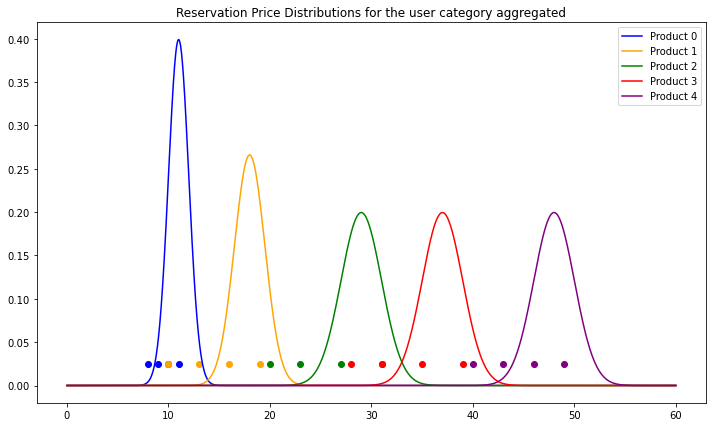

In [13]:
user_index = 0
x = np.arange(0, 60 , .01)
plt.figure(figsize=(12,7))

color_list = ['blue', 'orange', 'green', 'red', 'purple']

for i in range(5):
    res_price_distr = env.users[user_index].res_price_distr[i]
    y = res_price_distr.pdf(x)
    plt.plot(x, y, label = 'Product %d' %i, color = color_list[i])

for i in range(5):
    for j in range(4):
        plt.scatter(prices[i][j], 0.025, color = color_list[i])

plt.title("Reservation Price Distributions for the user category %s" %env.users[user_index].category)
plt.legend()
plt.show()

# Greedy Algorithm Example

In [14]:
greedy_optimizer = Greedy_optimizer(env)
greedy_optimizer.run()

{'expected_reward': 131.27420702376318, 'combination': [1, 2, 1, 1, 1]}

In [15]:
env.optimal_reward()

(131.27420702376318, [1, 2, 1, 1, 1])

# STEP 3 : Uncertain Convertion Rates

In [16]:
from step3_learner import TS_learner3

In [17]:
# Initial assumptions for beta parameters (uniform distr. on [0, 1])
a = np.ones((5,4))
b = np.ones((5,4))
initial_beta = [a, b]
learner = TS_learner3(initial_beta, env, learning_rate = 0.3)

In [18]:
n_runs = 100
daily_users = 400
n_days = 200

# delete possible old reward_history
learner.reward_history = []
learner.price_comb_history = []
learner.cr_matrix_list = []

In [ ]:
for i in range(n_runs) :
    learner.run(n_days, daily_users)

In [21]:
opt_reward = learner.opt_reward
collected_rewards = learner.reward_history

- ## Salvo la history su file in modo che siamo sicuri ti riuscire a recuperarla anche in un secondo momento

In [ ]:
with open('step3_rewards', 'wb') as f: 
    pickle.dump(collected_rewards, f)

- ## Per recuperare, invece, i risultati ottenuti in un secondo momento :

In [22]:
with open('step3_rewards', 'rb') as f: 
    collected_rewards = pickle.load(f)

- ## Cumulative Regret Plot

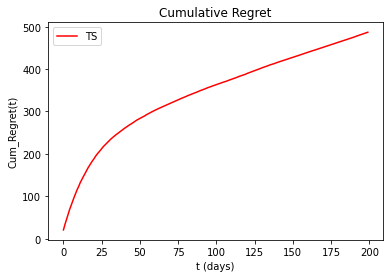

In [23]:
plt.figure(0)
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.title("Cumulative Regret")
plt.plot(np.cumsum(np.mean(opt_reward - collected_rewards, axis=0)), 'r')  #'r' stay for red, the color for the TS algorithm
plt.legend(["TS"])
plt.show()

- ## Standard Deviation Plot

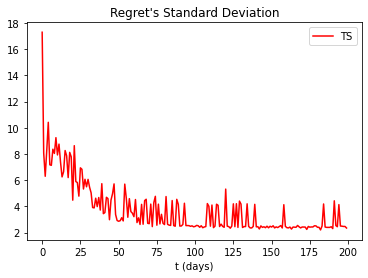

In [24]:
plt.figure(0)
plt.xlabel("t (days)")
plt.title("Regret's Standard Deviation")
plt.plot(np.std(opt_reward - collected_rewards, axis=0), 'r')  #'r' stay for red, the color for the TS algorithm
#plt.plot(np.std(opt - gr_rewards_per_experiment, axis=0), 'g')  #'g' stay for green, the color for the Greedy algorithm
plt.legend(["TS"])
plt.show()

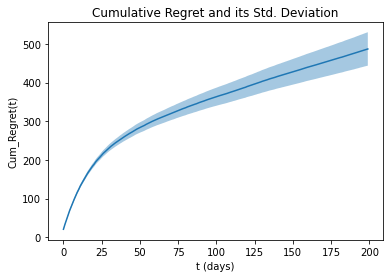

In [25]:
# mean_R = np.mean(R, axis=0)
cum_R = np.cumsum(opt_reward - collected_rewards, axis = 1)
mean_cum_R = np.mean(cum_R, axis = 0)
std_dev = np.std(cum_R, axis=0)/np.sqrt(n_runs)
plt.plot(mean_cum_R)
plt.fill_between(range(n_days), mean_cum_R-std_dev, mean_cum_R+std_dev, alpha=0.4)
plt.title("Cumulative Regret and its Std. Deviation")
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.show()

- ## Comparison between Optimal and Expected Reward

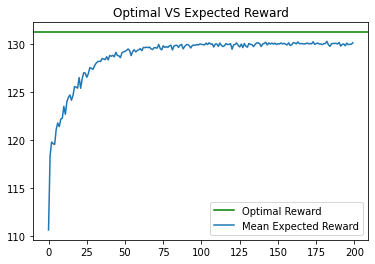

In [26]:
plt.figure(0)
plt.title("Optimal VS Expected Reward")
plt.axhline(opt_reward, color = 'green')
plt.plot(np.mean(collected_rewards, axis=0))
plt.legend(["Optimal Reward", "Mean Expected Reward"])
plt.show()

## Explore the istant regret in the collected runs of the step 3 learner

In [27]:
opt_reward = learner.opt_reward
(opt_reward - collected_rewards)[-2][-20:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
learner.price_comb_history[-1][-20:]

## Comparison between mean conversion rates estimated by last run of TS and real values

In [ ]:
CR_mean = np.array(learner.cr_matrix_list).mean(axis = 0)
i = 9
CR_i = learner.cr_matrix_list[i]
print("Mean of estimated conversion rates \n", CR_mean)

print("\nEstimated conversion rates for run %d \n" %i, CR_i)

In [ ]:
np.matrix(env.theoretical_values['conversion_rates'][0])

In [ ]:
# CODICE PER TESTARE SE UN PREZZO PER UN DETERMINATO PRODOTTO E' STATO "ESPLORATO" DALL'ALGORITMO
comb_list = learner.price_comb_history[-1]
count = 0
prod = 0
price = 0

for comb in comb_list :
    count += 1 if comb[prod] == price else 0

count

- ### Ucb1 - Greedy optimizer

In [28]:
# setting the run parameters
n_runs = 10
daily_users = 400
n_days = 200

In [29]:
ucb1_greedy_R = []
ucb1g_collected_rewards = []
for _ in range(n_runs):
    ucb_greedy = ucb1_greedy(daily_users, len(prices), len(prices[0]), prices, env)
    instant_regret = []
    ucb1g_collected_rewards_temp = []
    for t in range(n_days):
        pulled_arms = ucb_greedy.pull_arms()
        estimated_CR = env.simulate_day(daily_users, pulled_arms, ["conversion_rates"])['CR_vector']
        ucb_greedy.update(pulled_arms, estimated_CR)
        reward = env.expected_reward(pulled_arms)
        ucb1g_collected_rewards_temp.append(reward)
        instant_regret.append(opt_reward - reward)
    ucb1g_collected_rewards.append(ucb1g_collected_rewards_temp)
    cumulative_regret = np.cumsum(instant_regret)
    ucb1_greedy_R.append(cumulative_regret)

In [30]:
# store the result
with open("ucb1_greedy_R", 'wb') as f1:
    pickle.dump(ucb1_greedy_R, f1)
with open("ucb1g_collected_rewards", 'wb') as f1:
    pickle.dump(ucb1g_collected_rewards, f1)

In [31]:
# load the result
with open("ucb1_greedy_R", 'rb') as f1:
    ucb1_greedy_R = pickle.load(f1)
with open("ucb1g_collected_rewards", 'rb') as f1:
    ucb1g_collected_rewards = pickle.load(f1)

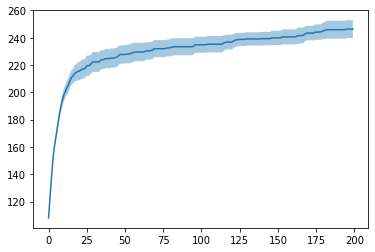

In [32]:
# plot of the result
mean_ucbg_R = np.mean(ucb1_greedy_R, axis=0)
std_dev_ucbg = np.std(ucb1_greedy_R, axis=0)/np.sqrt(n_runs)
plt.plot(mean_ucbg_R)
plt.fill_between(range(n_days), mean_ucbg_R-std_dev_ucbg, mean_ucbg_R+std_dev_ucbg, alpha=0.4)

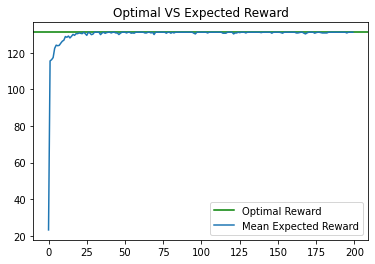

In [33]:
# comparison between optimal and expected reward
plt.figure(0)
plt.title("Optimal VS Expected Reward")
plt.axhline(opt_reward, color = 'green')
plt.plot(np.mean(ucb1g_collected_rewards, axis=0))
plt.legend(["Optimal Reward", "Mean Expected Reward"])
plt.show()

In [34]:
# lasts n arms pulled
ucb_greedy.pulled[-10:-1]

[[1, 2, 1, 1, 1],
 [1, 2, 1, 1, 1],
 [1, 2, 1, 1, 1],
 [1, 2, 1, 1, 1],
 [1, 2, 1, 1, 1],
 [1, 2, 1, 1, 1],
 [1, 2, 1, 1, 1],
 [1, 2, 1, 1, 1],
 [1, 2, 1, 1, 1]]

In [35]:
combinations_data = [[] for i in range(1024)]
for i1 in range(4):
    for i2 in range(4):
        for i3 in range(4):
            for i4 in range(4):
                for i5 in range(4):
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append([i1, i2, i3, i4, i5])
                    c = np.array(ucb_greedy.pulled) == [i1, i2, i3, i4, i5]
                    c = np.prod(c, axis=1)
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append(np.count_nonzero(c))
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append(env.expected_reward([i1, i2, i3, i4, i5]))

In [36]:
# how many times I pulled the n most pulled arms
x = combinations_data
result = []
for i in range(20):
    result.append(x[np.argmax(np.array(x)[:, 1])])
    x = np.delete(x, np.argmax(np.array(x)[:, 1]), axis=0).tolist()
print("Ucb most pulled combination:")
print(env.optimal_reward()[1], env.optimal_reward()[0])
print("\n\narms pulled - n° pulls - exp rew")
result

C:\Users\stefa\AppData\Local\Temp/ipykernel_1744/2206888100.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result.append(x[np.argmax(np.array(x)[:, 1])])
C:\Users\stefa\AppData\Local\Temp/ipykernel_1744/2206888100.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.delete(x, np.argmax(np.array(x)[:, 1]), axis=0).tolist()
C:\Users\stefa\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different le

Ucb most pulled combination:
[1, 2, 1, 1, 1] 131.27420702376318


arms pulled - n° pulls - exp rew


[[[1, 2, 1, 1, 1], 181, 131.27420702376318],
 [[1, 2, 2, 1, 1], 8, 127.35080200924315],
 [[1, 2, 2, 2, 1], 4, 122.37283914152289],
 [[2, 2, 2, 2, 2], 2, 115.59833226584848],
 [[1, 2, 1, 1, 2], 1, 126.02547401143141],
 [[1, 2, 2, 1, 2], 1, 122.24241717715847],
 [[1, 2, 2, 2, 2], 1, 117.53017610385669],
 [[2, 2, 2, 1, 1], 1, 125.37685079748823],
 [[3, 3, 3, 3, 3], 1, 23.194000787914362],
 [[0, 0, 0, 0, 0], 0, 113.31538815334187],
 [[0, 0, 0, 0, 1], 0, 115.84242041917071],
 [[0, 0, 0, 0, 2], 0, 110.92926341501901],
 [[0, 0, 0, 0, 3], 0, 84.82484901785013],
 [[0, 0, 0, 1, 0], 0, 116.91371734198847],
 [[0, 0, 0, 1, 1], 0, 119.43490613594447],
 [[0, 0, 0, 1, 2], 0, 114.41037095361507],
 [[0, 0, 0, 1, 3], 0, 87.92103980332269],
 [[0, 0, 0, 2, 0], 0, 112.17661324628887],
 [[0, 0, 0, 2, 1], 0, 114.55328340972557],
 [[0, 0, 0, 2, 2], 0, 109.79604296630217]]

In [37]:
# find ucb information from arms combination
comb = [1, 2, 1, 1, 1]
ind = np.where(np.prod(np.array(np.array(combinations_data)[:, 0].tolist()) == np.array(comb), axis=1) == 1)[0][0]
print(combinations_data[ind])
#estimated_cr = (env.simulate_day(6000, comb, ["conversion_rates"])['CR_vector'])
#print(estimated_cr)

[[1, 2, 1, 1, 1], 181, 131.27420702376318]


C:\Users\stefa\AppData\Local\Temp/ipykernel_1744/1035734439.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ind = np.where(np.prod(np.array(np.array(combinations_data)[:, 0].tolist()) == np.array(comb), axis=1) == 1)[0][0]
